# Observations and Insights 

#Three observations of the following study: 
1) The correlation coefficient between mouse weight and average tumor volume is 0.84, showing a positive correlation between the 2 variables. The scatter plot with linear regression line is a good visual of this strong link.
2) The 2 drugs of Capomulin and Ramicane had the lowest final tumor volume of the 4 drugs pulled for comparison. This has the possiblity that the drugs were shrinking the tumors. This is also shown in the single mouse line plot. 
3) Capomulin and Ramicane had the most data points of all the drugs used.
4) There was an equal mix of male versus female mice in the trial.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from scipy import stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

In [2]:
#view mouse data
mouse_metadata_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
#view study results
study_results_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
#look at value counts to find duplicate mice
study_results_df['Mouse ID'].value_counts()

g989    13
f545    10
g570    10
j119    10
q597    10
        ..
b447     1
u153     1
d133     1
n482     1
h428     1
Name: Mouse ID, Length: 249, dtype: int64

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
find_dup_mouse_id = study_results_df.loc[study_results_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
print(find_dup_mouse_id)

['g989']


In [6]:
# Optional: Get all the data for the duplicate mouse ID. duplicate is mouse g989.
mouse_metadata_df.loc[mouse_metadata_df['Mouse ID'] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,Propriva,Female,21,26


In [7]:
# Optional: Get all the data for the duplicate mouse ID. -part 2
study_results_df.loc[study_results_df['Mouse ID'] == 'g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,0,45.000000,0
137,g989,0,45.000000,0
329,g989,5,48.786801,0
360,g989,5,47.570392,0
620,g989,10,51.745156,0
681,g989,10,49.880528,0
815,g989,15,51.325852,1
869,g989,15,53.442020,0
950,g989,20,55.326122,1
1111,g989,20,54.657650,1


In [8]:
# Create a cleaned DataFrame by dropping the duplicate mouse by its ID.

clean_study_results_df = study_results_df[study_results_df['Mouse ID'].isin(find_dup_mouse_id)==False]
clean_mouse_data_df = mouse_metadata_df[mouse_metadata_df['Mouse ID'].isin(find_dup_mouse_id)==False]

In [9]:
#combine the dataframes using Mouse ID
combined_mouse_data_df = pd.merge(clean_study_results_df, clean_mouse_data_df, on = "Mouse ID")
combined_mouse_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [10]:
# Checking the number of mice in the DataFrame. = all good data now, mice = 248
combined_mouse_data_df['Mouse ID'].value_counts()

b879    10
f545    10
g570    10
j119    10
q597    10
        ..
x226     1
o848     1
b447     1
d133     1
h428     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen.

mouse_count = combined_mouse_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].count()
drug_mean = combined_mouse_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
drug_median = combined_mouse_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
drug_variance = combined_mouse_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
drug_stdev = combined_mouse_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
drug_sem = combined_mouse_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

drug_stat_summary_df = pd.DataFrame({"Total Mouse Timepoints": mouse_count, "TumorVolume_Mean":drug_mean, "TumorVolume_Median":drug_median,
                                     "TumorVolume_Variance":drug_variance, "TumorVolume_StandardDeviation":drug_stdev, 
                                    "TumorVolume_SEM":drug_sem})

drug_stat_summary_df

,Total Mouse Timepoints,TumorVolume_Mean,TumorVolume_Median,TumorVolume_Variance,TumorVolume_StandardDeviation,TumorVolume_SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,148,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

Text(0.5, 1.0, 'Total Number of Data Points per Drug Regimen')

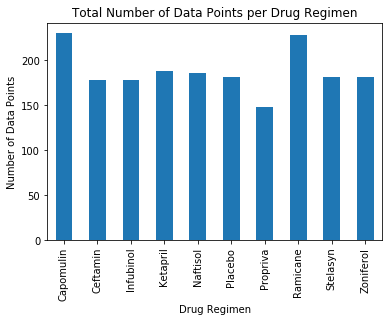

In [12]:
# Generate a bar plot showing the number of data points for each treatment using pandas. 

drug_stat_summary_df['Total Mouse Timepoints'].plot(kind="bar")

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title("Total Number of Data Points per Drug Regimen")

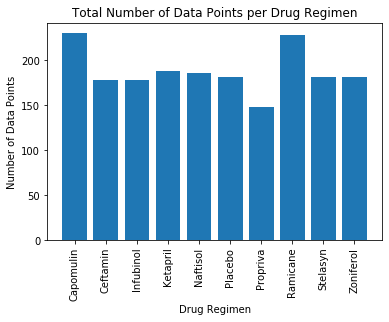

In [13]:
# Generate a bar plot showing the number of data points for each treatment using pyplot.
x_axis_count = drug_stat_summary_df.index
y_axis_count = drug_stat_summary_df['Total Mouse Timepoints']
plt.bar(x_axis_count, y_axis_count)

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.xticks(rotation='vertical')
plt.title('Total Number of Data Points per Drug Regimen')

plt.show()

In [14]:
# Generate a bar plot showing the *number of mice per time point for each treatment* 
#throughout the course of the study using pandas. 

#drug_time = combined_mouse_data_df.groupby(['Drug Regimen', 'Timepoint']).count()
#drug_time_group_df = pd.DataFrame(drug_time["Mouse ID"])
#drug_time_group_df.head()
#combined_mouse_data_df
#drug_time_group_df.plot(kind="bar", y="Mouse ID", subplots=True, figsize=(20,10))

In [15]:
# Generate a bar plot showing the *number of mice per time point for each treatment* 
#throughout the course of the study using pyplot.

#x_axis = np.arange(len(drug_time_group_df))
#plt.bar(x_axis, drug_time_group_df['Mouse ID'])
#plt.figure(figsize=(20,20))

## Pie Plots

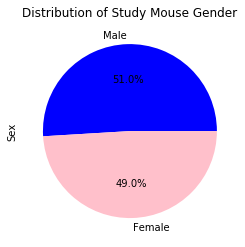

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

combined_mouse_data_df["Sex"].value_counts().plot(kind ="pie", colors =["blue", "pink"], autopct='%.1f%%', title="Distribution of Study Mouse Gender")



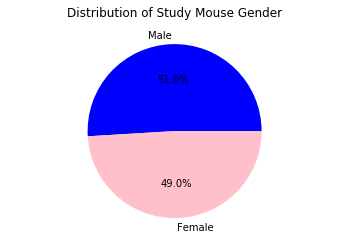

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
colors = ["blue", "pink"]
plt.axis("equal")
plt.title("Distribution of Study Mouse Gender")
plt.pie(combined_mouse_data_df["Sex"].value_counts(), labels=labels, colors=colors, autopct="%1.1f%%")

plt.show()


## Quartiles, Outliers and Boxplots

In [18]:
combined_mouse_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1875,m601,25,33.118756,1,Capomulin,Male,22,17
1876,m601,30,31.758275,1,Capomulin,Male,22,17
1877,m601,35,30.834357,1,Capomulin,Male,22,17
1878,m601,40,31.378045,1,Capomulin,Male,22,17


In [19]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: 
#Capomulin, Ramicane, Infubinol, and Ceftamin.
#Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers 
#across all four treatment regimens. 

#pull out 4 drugs of choice
tumorvol_4drug_df = combined_mouse_data_df.loc[(combined_mouse_data_df["Drug Regimen"] =="Capomulin") |
                                              (combined_mouse_data_df["Drug Regimen"] =="Ceftamin") |
                                               (combined_mouse_data_df["Drug Regimen"] =="Infubinol") |
                                               (combined_mouse_data_df["Drug Regimen"] =="Ramicane"), :]

#print(tumorvol_4drug_df)

#sort by timepoints with last values on top
tumorvol_4drug_sort_df = tumorvol_4drug_df.sort_values('Timepoint', ascending=False)

#print(tumorvol_4drug_df)

#get rid of other timepoints & keep first value which should be final timepoint per mouse
tumorvol_4drug_final_df = tumorvol_4drug_sort_df.drop_duplicates(subset="Mouse ID", keep='first')

tumorvol_4drug_final_df

# Push DataFrame to a new CSV file for test
#tumorvol_4drug_final_df.to_csv("Data/ML_4drug.csv", encoding="utf-8", index=False, header=True)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1879,m601,45,28.430964,1,Capomulin,Male,22,17
1687,s185,45,23.343598,1,Capomulin,Female,3,17
1351,y865,45,64.729837,3,Ceftamin,Male,23,26
1484,x581,45,64.634949,3,Ceftamin,Female,19,28
1831,l897,45,38.846876,1,Capomulin,Male,17,19
...,...,...,...,...,...,...,...,...
1414,m756,5,47.010364,1,Infubinol,Male,19,30
1454,b447,0,45.000000,0,Ceftamin,Male,2,30
1636,t573,0,45.000000,0,Ceftamin,Female,15,27
1388,u153,0,45.000000,0,Ceftamin,Female,11,25


In [20]:
#calc quartiles & IRQ for all 4 drugs *combined*
##quartiles = tumorvol_4drug_final_df['Tumor Volume (mm3)'].quantile([0.25, 0.5, 0.75])
##lowerq = quartiles[0.25]
##upperq = quartiles[0.75]
##irq = upperq - lowerq

#calc upper & lower bounds
##lower_bound = lowerq - (1.5*irq)
##upper_bound = upperq + (1.5*irq)

##print(lowerq, upperq, irq, lower_bound, upper_bound)
#quartiles = california_data['AveOccup'].quantile([.25,.5,.75])

In [21]:
#separate out capomulin in dataframe & calc quartiles & IRQ
cap_finalvol = tumorvol_4drug_final_df.loc[tumorvol_4drug_final_df["Drug Regimen"] =="Capomulin", :]
cap_finalvol_df = pd.DataFrame(cap_finalvol)
cap_tumor = cap_finalvol_df["Tumor Volume (mm3)"]
#cap_finalvol_df
quartiles_cap = cap_tumor.quantile([0.25, 0.5, 0.75])
lowerq_cap = quartiles_cap[0.25]
upperq_cap = quartiles_cap[0.75]
irq_cap = upperq_cap - lowerq_cap
#calc upper & lower bounds
lower_bound_cap = lowerq_cap - (1.5*irq_cap)
upper_bound_cap = upperq_cap + (1.5*irq_cap)

print(f"Capomulin: Lower quartile: {lowerq_cap} Upper quartile:  {upperq_cap} IRQ: {irq_cap}") 
print(f"Lower outliers below: {lower_bound_cap} Upper outliers above: {upper_bound_cap}")


Capomulin: Lower quartile: 32.37735684 Upper quartile:  40.1592203 IRQ: 7.781863460000004
Lower outliers below: 20.70456164999999 Upper outliers above: 51.83201549


In [22]:
#separate out ceftamin in dataframe & calc quartiles & IRQ
ceft_finalvol = tumorvol_4drug_final_df.loc[tumorvol_4drug_final_df["Drug Regimen"] =="Ceftamin", :]
ceft_finalvol_df = pd.DataFrame(ceft_finalvol)
ceft_tumor = ceft_finalvol_df["Tumor Volume (mm3)"]
#ceft_finalvol_df
quartiles_ceft = ceft_tumor.quantile([0.25, 0.5, 0.75])
lowerq_ceft = quartiles_ceft[0.25]
upperq_ceft = quartiles_ceft[0.75]
irq_ceft = upperq_ceft - lowerq_ceft
#calc upper & lower bounds
lower_bound_ceft = lowerq_ceft - (1.5*irq_ceft)
upper_bound_ceft = upperq_ceft + (1.5*irq_ceft)

print(f"Ceftamin: Lower quartile: {lowerq_ceft} Upper quartile:  {upperq_ceft} IRQ: {irq_ceft}") 
print(f"Lower outliers below: {lower_bound_ceft} Upper outliers above: {upper_bound_ceft}")


Ceftamin: Lower quartile: 48.72207785 Upper quartile:  64.29983003 IRQ: 15.577752179999997
Lower outliers below: 25.355449580000002 Upper outliers above: 87.66645829999999


In [23]:
#separate out infubinol in dataframe & calc quartiles & IRQ
inf_finalvol = tumorvol_4drug_final_df.loc[tumorvol_4drug_final_df["Drug Regimen"] =="Infubinol", :]
inf_finalvol_df = pd.DataFrame(inf_finalvol)
inf_tumor = inf_finalvol_df["Tumor Volume (mm3)"]
#inf_finalvol_df
quartiles_inf = inf_tumor.quantile([0.25, 0.5, 0.75])
lowerq_inf = quartiles_inf[0.25]
upperq_inf = quartiles_inf[0.75]
irq_inf = upperq_inf - lowerq_inf
#calc upper & lower bounds
lower_bound_inf = lowerq_inf - (1.5*irq_inf)
upper_bound_inf = upperq_inf + (1.5*irq_inf)

print(f"Infubinol: Lower quartile: {lowerq_inf} Upper quartile:  {upperq_inf} IRQ: {irq_inf}") 
print(f"Lower outliers below this value: {lower_bound_inf} Upper outliers above this value: {upper_bound_inf}")


Infubinol: Lower quartile: 54.04860769 Upper quartile:  65.52574285 IRQ: 11.477135160000003
Lower outliers below this value: 36.83290494999999 Upper outliers above this value: 82.74144559000001


In [24]:
#separate out ramicane in dataframe & calc quartiles & IRQ
ram_finalvol = tumorvol_4drug_final_df.loc[tumorvol_4drug_final_df["Drug Regimen"] =="Ramicane", :]
ram_finalvol_df = pd.DataFrame(ram_finalvol)
ram_tumor = ram_finalvol_df["Tumor Volume (mm3)"]
#ram_finalvol_df
quartiles_ram = ram_tumor.quantile([0.25, 0.5, 0.75])
lowerq_ram = quartiles_ram[0.25]
upperq_ram = quartiles_ram[0.75]
irq_ram = upperq_ram - lowerq_ram
#calc upper & lower bounds
lower_bound_ram = lowerq_ram - (1.5*irq_ram)
upper_bound_ram = upperq_ram + (1.5*irq_ram)

print(f"Ramicane: Lower quartile: {lowerq_ram} Upper quartile:  {upperq_ram} IRQ: {irq_ram}") 
print(f"Lower outliers below: {lower_bound_ram} Upper outliers above: {upper_bound_ram}")


Ramicane: Lower quartile: 31.56046955 Upper quartile:  40.65900627 IRQ: 9.098536719999998
Lower outliers below: 17.912664470000003 Upper outliers above: 54.30681135


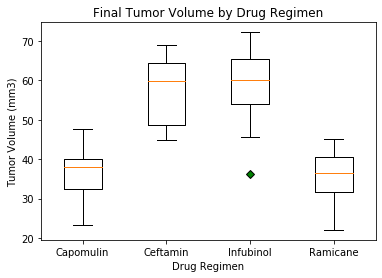

In [25]:
#plot all 4 drug regimens as box & whisker plot, marking outliers
data_to_plot = [cap_tumor, ceft_tumor, inf_tumor, ram_tumor]
fig1, ax1 = plt.subplots()
green_diamond = dict(markerfacecolor='g', marker='D')
ax1.set_title('Final Tumor Volume by Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(data_to_plot, labels=["Capomulin", "Ceftamin", "Infubinol", "Ramicane"], flierprops=green_diamond)

plt.show()


## Line and Scatter Plots

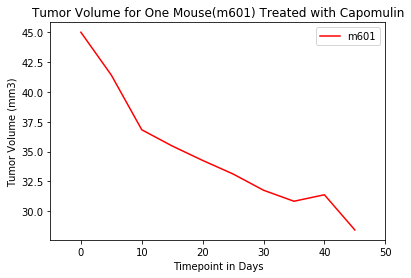

In [26]:
# Generate a line plot of time point versus tumor volume for a mouse (m601) treated with Capomulin
m601_info = combined_mouse_data_df.loc[combined_mouse_data_df["Mouse ID"] == "m601", :]
m601_info_df = pd.DataFrame(m601_info)
x_axis = m601_info_df['Timepoint']
y_axis = m601_info_df['Tumor Volume (mm3)']
m601_plot, = plt.plot(x_axis, y_axis, color="red", label="m601")
plt.xlim(-5,50)
plt.xlabel('Timepoint in Days')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume for One Mouse(m601) Treated with Capomulin')
plt.legend()

#m601_info_df.head()
plt.show()
#combined_mouse_data_df  first mouse w cap

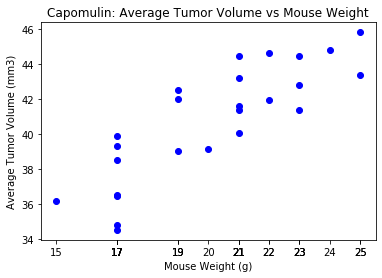

In [27]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
all_cap_info = combined_mouse_data_df.loc[combined_mouse_data_df["Drug Regimen"] == "Capomulin", :]
all_cap_info_df = pd.DataFrame(all_cap_info)
cap_ave = all_cap_info.groupby(["Mouse ID"]).mean()
x_axis_cap = cap_ave['Weight (g)']
y_axis_cap = cap_ave['Tumor Volume (mm3)']
plt.scatter(x_axis_cap, y_axis_cap, marker="o", facecolors="blue")
plt.xticks(x_axis_cap)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Capomulin: Average Tumor Volume vs Mouse Weight')

plt.show()
#plt.scatter(temp, sales, marker="o", facecolors="red", edgecolors="black")

## Correlation and Regression

In [28]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

print(f"The correlation coefficient between mouse weight and average tumor volume is {round(st.pearsonr(x_axis_cap,y_axis_cap)[0],2)}")


The correlation coefficient between mouse weight and average tumor volume is 0.84


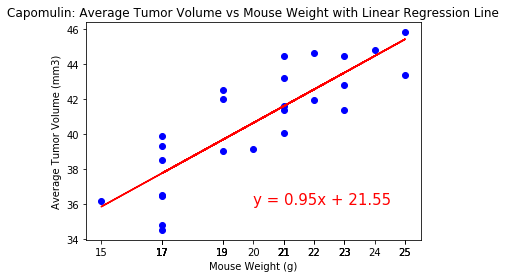

In [29]:
# Calculate the linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
cap_slope, cap_int, cap_r, cap_p, cap_std_err = stats.linregress(x_axis_cap,y_axis_cap)
cap_fit = cap_slope * x_axis_cap + cap_int


# Plot the linear model on top of scatter plot 

plt.scatter(x_axis_cap, y_axis_cap, marker="o", facecolors="blue")
plt.plot(x_axis_cap,cap_fit, color="red")
line_eq = "y = " + str(round(cap_slope,2)) + "x + " + str(round(cap_int,2))
plt.xticks(x_axis_cap)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Capomulin: Average Tumor Volume vs Mouse Weight with Linear Regression Line')
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.show()
